<a href="https://colab.research.google.com/github/HarisMashood/ADL_Exercises/blob/main/Exercise_4_ADL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Student Name: Haris Mashood
## Student Number: 2413298
## Campus: Joensuu

# Exercise 4: Batch Normalization Effect

In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models, Input
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Function to create CNN model with or without Batch Normalization
def create_cnn(activation, input_shape, use_batch_norm=False):
    inputs = Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation=activation)(inputs)
    if use_batch_norm:
        x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), activation=activation)(x)
    if use_batch_norm:
        x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), activation=activation)(x)
    if use_batch_norm:
        x = layers.BatchNormalization()(x)

    x = layers.Flatten()(x)
    x = layers.Dense(64)(x)
    if use_batch_norm:
        x = layers.BatchNormalization()(x)
        x = layers.Activation(activation)(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

In [4]:
# Function to train and evaluate the model
def train_and_evaluate(model, x_train, y_train, x_test, y_test, learning_rate, epochs):
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        verbose=1)
    return history

In [5]:
# Function to plot results
def plot_comparison(histories):
    plt.figure(figsize=(15, 5))

    # Classification error plot
    plt.subplot(1, 2, 1)
    for model_type, history in histories.items():
        train_error = [(1 - acc) * 100 for acc in history.history['accuracy']]
        val_error = [(1 - acc) * 100 for acc in history.history['val_accuracy']]
        plt.plot(train_error, label=f'{model_type} (Training)')
        plt.plot(val_error, label=f'{model_type} (Validation)')
    plt.title('Classification Error')
    plt.xlabel('Epoch')
    plt.ylabel('Error (%)')
    plt.legend()
    plt.grid(True)

    # Loss plot
    plt.subplot(1, 2, 2)
    for model_type, history in histories.items():
        plt.plot(history.history['loss'], label=f'{model_type} (Training)')
        plt.plot(history.history['val_loss'], label=f'{model_type} (Validation)')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [6]:
# Training configurations
learning_rate = 0.001
epochs = 10
histories = {}

# Train CNN without Batch Normalization
print('Training CNN without Batch Normalization')
model_without_bn = create_cnn('relu', (28, 28, 1), use_batch_norm=False)
history_without_bn = train_and_evaluate(model_without_bn, x_train, y_train, x_test, y_test, learning_rate, epochs)
histories['Without BN'] = history_without_bn

Training CNN without Batch Normalization
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9053 - loss: 0.3118 - val_accuracy: 0.9848 - val_loss: 0.0477
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9865 - loss: 0.0449 - val_accuracy: 0.9891 - val_loss: 0.0321
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9899 - loss: 0.0314 - val_accuracy: 0.9880 - val_loss: 0.0349
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9918 - loss: 0.0256 - val_accuracy: 0.9899 - val_loss: 0.0341
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9943 - loss: 0.0181 - val_accuracy: 0.9927 - val_loss: 0.0256
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9950 - loss: 0.0135 - val_accuracy: 0.9900 - val_loss: 0.0351
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9961 - loss: 0.0125 - val_accuracy: 0.9892 - val_loss: 0.0394
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3m

In [7]:
# Train CNN with Batch Normalization
print('Training CNN with Batch Normalization')
model_with_bn = create_cnn('relu', (28, 28, 1), use_batch_norm=True)
history_with_bn = train_and_evaluate(model_with_bn, x_train, y_train, x_test, y_test, learning_rate, epochs)
histories['With BN'] = history_with_bn

Training CNN with Batch Normalization
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9387 - loss: 0.2287 - val_accuracy: 0.9873 - val_loss: 0.0399
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9876 - loss: 0.0415 - val_accuracy: 0.9871 - val_loss: 0.0375
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9905 - loss: 0.0285 - val_accuracy: 0.9908 - val_loss: 0.0302
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9926 - loss: 0.0217 - val_accuracy: 0.9928 - val_loss: 0.0232
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9945 - loss: 0.0166 - val_accuracy: 0.9919 - val_loss: 0.0269
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9944 - loss: 0.0161 - val_accuracy: 0.9923 - val_loss: 0.0226
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9960 - loss: 0.0123 - val_accuracy: 0.9904 - val_loss: 0.0332
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/

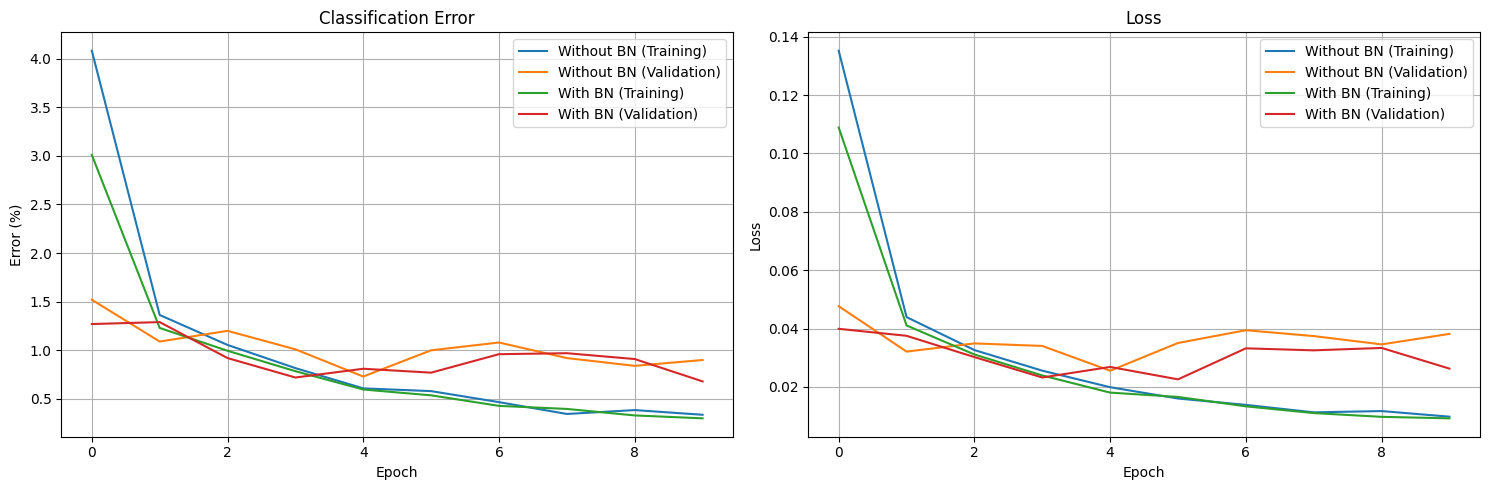

In [8]:
# Plot and compare results
plot_comparison(histories)

# Results Explanation

Based on the graphs above we can clearly see that:

* **Without BN**: Although it gave a high validation accuracy of 99.16%, oscillations in validation loss were present, showing mild overfitting and less generalization stability.

* **With BN**: Gave a higher validation accuracy of 99.32% with more stable validation loss; both training efficiency and generalization improved because of normalized activations.

## Key Observations

* **Faster Convergence with BN**: Training loss decreased more quickly during early epochs due to smoother optimization.

* **Better Generalization**: BN stabilized validation accuracy earlier and achieved a higher peak.

## Why BN Was Better

* **Improved Generalization**: Avoids overfitting by normalizing the distributions of activations.

* **Faster Training**: Keeps the gradient flow constant for smoother learning.
Robust Optimization: Reduces sensitivity to initialization and ensures training stability.